<a href="https://colab.research.google.com/github/KeshekaE/ColabUTD/blob/main/Week3_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x = np.array([[200.0, 17.0]])
layer_1 = Dense(units=3, activation='sigmoid')
a1 = layer_1(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

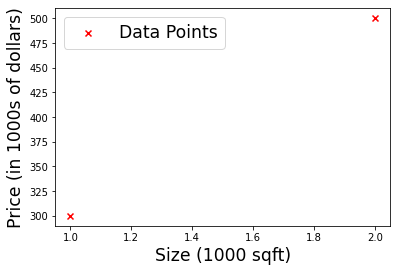

In [ ]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [ ]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [ ]:
linear_layer.get_weights()

[]

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.4269346]], shape=(1, 1), dtype=float32)


In [ ]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.4269346]], b=[0.]


In [ ]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [ ]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [ ]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

NameError: ignored

In [ ]:
x = np.array([[200.0, 17.0]])
layer_1 = Dense(units=3, activation='sigmoid')
a1 = layer_1(x)

layer_2 = Dense(units=2, activation='sigmoid')
a2 = layer_2(a1)

# Pytorch

In [ ]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

# Defining libraries

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [ ]:
X , Y = make_classification(n_features=4, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=3)

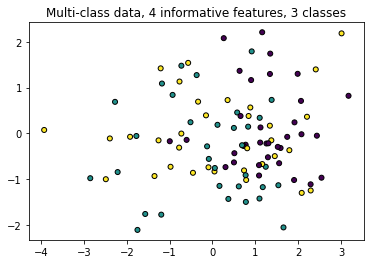

In [ ]:
plt.title("Multi-class data, 4 informative features, 3 classes", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((67, 4), (33, 4), (67,), (33,))

In [ ]:
Y_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(np.asarray(Y_test))

In [ ]:
class Data(Dataset):
    def __init__(self):
        self.X=torch.from_numpy(X_train)
        self.Y=torch.from_numpy(Y_train)
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
data=Data()
loader=DataLoader(dataset=data,batch_size=64)

In [ ]:
print(data.X[0:5])
print(data.X.shape)
print(data.Y[0:5])
print(data.Y.shape)

tensor([[ 1.3493,  1.7406,  1.1714, -1.1594],
        [-2.2748,  0.6870,  1.9522,  2.7495],
        [-0.4549, -0.8627,  1.4165, -1.1503],
        [ 1.5392, -1.1345, -0.7687, -2.1495],
        [ 2.4385, -0.0524,  0.3530, -0.5918]], dtype=torch.float64)
torch.Size([67, 4])
tensor([0, 1, 2, 1, 0])
torch.Size([67])


In [ ]:
ip=4     
hid = 25 
op=3    

In [ ]:
class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

In [ ]:
clf=Net(ip,hid,op)

In [ ]:
print(clf.parameters)

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=4, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=3, bias=True)
)>


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

In [ ]:
learning_rate = 1e-1
loss_list = []
for t in range(1000):
    y_pred = clf(x)
    loss = criterion(y_pred, y)
    loss_list.append(loss.item())
    clf.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf.parameters():
            param -= learning_rate * param.grad

NameError: ignored

ValueError: ignored

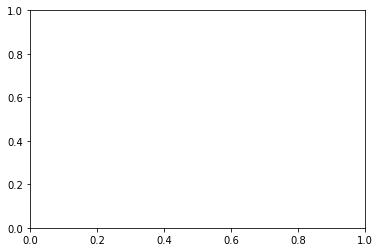

In [ ]:
step = np.linspace(0,1000,1000)
plt.plot(step,np.array(loss_list))

In [ ]:
par = list(clf.parameters())
w = par[0].detach().numpy()[0]
b = par[1].detach().numpy()[0]
t= par[3].detach().numpy()[0]
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap='jet')
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
plt.plot(u, (0.5-b-w[0]*u)/w[1])
plt.plot(u, (0.5-t-w[0]*u)/w[1])
plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)

In [ ]:
x_val = torch.from_numpy(X_test)
z=clf(x_val)
yhat=torch.max(z.data,1)
yhat[1]